In [2]:
import sys
import os
import os.path
import numpy as np
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True, precision=5)
np.set_printoptions(linewidth=1000)
np.core.arrayprint._line_width = 1000

def ims(imgarr, title=None, cmap=plt.cm.gray):
    # plt.imshow(image3)
    # plt.xticks([]), plt.yticks([])
    # plt.show()
    fig, ax = plt.subplots(1, 1, dpi=125, tight_layout=False)
    ax.imshow(imgarr, cmap=cmap)
    ax.set_title("" if title is None else title, size=8)
    ax.set_axis_off()
    plt.show()


def b2r(img):
    B, G, R = cv2.split(img)
    return(cv2.merge([R, G, B]))
    

    
# Import functions from ps03.py.
sys.path.append("G:/Repos/GT/CS6476/ps03")
import ps3
import experiment



# Simulated images. 
tmpl_path = "G:/Repos/GT/CS6476/ps03/input_images/template.jpg"
tmpl = cv2.imread(tmpl_path)

# Real images. 
y_path0 = "G:/Repos/GT/CS6476/ps03/input_videos/ps3-4-a.mp4"
y_path1 = "G:/Repos/GT/CS6476/ps03/input_videos/ps3-4-b.mp4"
y_path2 = "G:/Repos/GT/CS6476/ps03/input_videos/ps3-4-c.mp4"
y_path3 = "G:/Repos/GT/CS6476/ps03/input_videos/ps3-4-d.mp4"






In [ ]:
img_path = "G:/Repos/GT/CS6476/ps03/output/cache/0_1.png"
img_init =  cv2.imread(img_path)
img = img_init.copy()

dst = cv2.fastNlMeansDenoising(img, h=17, templateWindowSize=7, searchWindowSize=21)
dst2 = cv2.medianBlur(dst, 3)
ims(b2r(img))
ims(b2r(dst))
ims(b2r(dst2))



centersc=[(134, 107), (132, 248), (446, 108), (444, 256)], centersc_ok=True
centersh=[(138, 105), (133, 250), (444, 114), (450, 252)], centersh_ok=True
centerst0=[(134, 108), (133, 250), (447, 109), (445, 256)], centerst0_ok=True
centers=[(134, 108), (133, 250), (447, 109), (445, 256)]


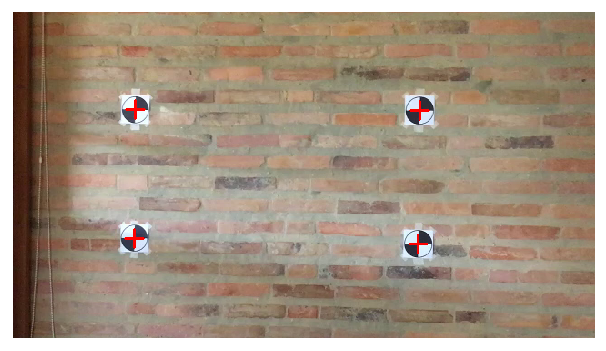

In [3]:
img_path = "G:/Repos/GT/CS6476/ps03/output/outvids0/0000.png"
img_init =  cv2.imread(img_path)
img = img_init.copy()

tmpl_path = "G:/Repos/GT/CS6476/ps03/input_images/template.jpg"
tmpl_init = cv2.imread(tmpl_path)
tmpl = tmpl_init.copy()
tmpl_mono_ = cv2.cvtColor(tmpl.copy(), cv2.COLOR_BGR2GRAY)
tmpl_mono = cv2.GaussianBlur(tmpl_mono_, (3, 3), 0)


# mono_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# mono = cv2.fastNlMeansDenoising(mono_, h=17, templateWindowSize=7, searchWindowSize=21)
# mono = cv2.medianBlur(mono, 3)

# centersc = ps3._circle_search(mono, tmpl_mono)
centers = ps3.find_markers(img, template=tmpl, trace=True)

# centersh = ps3._adaptive_harris_search(mono)
# centerst1 = ps3._adaptive_tmpl_search(mono, tmpl_mono, centersh)
# print("centersh: {}".format(centersh))
# print("centerst1: {}".format(centerst1))

for ii, jj in centers:
    cv2.drawMarker(
        img, (int(ii), int(jj)), (0 ,0, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
        )   
# for ii, jj in centersc:
#     cv2.drawMarker(
#         img, (int(ii), int(jj)), (0 ,255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
#         )   

ims(b2r(img))


In [8]:
img = img_init.copy()
mono_ = cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 3)
_, mono = cv2.threshold(mono_, 75, 255, cv2.THRESH_BINARY)
mono = cv2.bitwise_not(mono)

centersh = ps3._adaptive_harris_search(mono)
centerst1 = ps3._adaptive_tmpl_search(mono, tmpl_mono, centersh)
# centers = ps3.find_markers(img, template=tmpl, trace=True)

# centersh = ps3._adaptive_harris_search(mono)
# centerst1 = ps3._adaptive_tmpl_search(mono, tmpl_mono, centersh)
# print("centersh: {}".format(centersh))
# print("centerst1: {}".format(centerst1))

for ii, jj in centerst1:
    cv2.drawMarker(
        img, (int(ii), int(jj)), (0 ,0, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
        ) 
ims(b2r(img))


TypeError: 'NoneType' object is not iterable

In [ ]:
centersc = ps3._circle_search(mono, tmpl_mono)

try: 
    centers0 = ps3._simple_tmpl_search(mono, tmpl_mono)
except:
    centers0 = None

try:
    centers1 = ps3._adaptive_harris_search(mono)
    centers2 = ps3._adaptive_tmpl_search(mono, tmpl_mono, centers1)
except:
    centers1, centers2 = None, None

centers = ps3.find_markers(img, template=tmpl)




print("centersc: {}".format(centersc))
print("centers0: {}".format(centers0))
print("centers1: {}".format(centers1))
print("centers2: {}".format(centers2))
print("centers : {}".format(centers))
    
    
    
if circles is not None:
    for ii in circles[0,:]:
        cv2.circle(img, (int(ii[0]), int(ii[1])), int(ii[2]), (255, 255, 0), 2)
    
if centers0 is not None:
    for ii, jj in centers0: # yellow
        cv2.drawMarker(
            img, (int(ii), int(jj)), (0, 255, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
            )   

if centers1 is not None:
    for ii, jj in centers1:
        cv2.drawMarker(
            img, (int(ii), int(jj)), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
            )   

if centers2 is not None:
    for ii, jj in centers2:
        cv2.drawMarker(
            img, (int(ii), int(jj)), (0 ,0, 255), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
            )   

# for ii, jj in centers:
#     print("centers: {}".format(centers))
#     cv2.drawMarker(
#         img, (int(ii), int(jj)), (255, 0, 0), markerType=cv2.MARKER_CROSS, markerSize=25, thickness=2
#         )  
    # cv2.putText(img, "[{},{}]".format(int(ii), int(jj)), (int(ii)-10, int(jj)-20), cv2.FONT_HERSHEY_SIMPLEX, .75, (0,10,0), 3)


    
ims(b2r(img))

In [ ]:
centers1 = [
    (int(ii), int(jj)) for ii, jj in
    ps3._sort_markers(img, ps3._adaptive_harris_search(mono))
    ]

centers0 = ps3._sort_markers(img, centers)

xx1, yy1 = list(zip(*centers1))
xx0, yy0 = list(zip(*centers0))


dxx = [np.abs((jj - ii) / jj) for ii,jj in zip(xx0, xx1)]
dyy = [np.abs((jj - ii) / jj) for ii,jj in zip(yy0, yy1)]
dtt = [(ii+jj) / 2 for ii,jj in zip(dxx, dyy)]

cc_chk = np.all([ii<=.25 for ii in dtt])
print("centers1: {}".format(centers1))
print("centers0: {}".format(centers0))
print("dxx: {}".format(dxx))
print("dyy: {}".format(dyy))
print("dtt: {}".format(dtt))
print(cc_chk)


In [ ]:
for ii, jj in centers:
    cv2.drawMarker(
        img, (int(ii), int(jj)), (0, 255, 0), markerType=cv2.MARKER_CROSS, markerSize=20, thickness=2
        )   


        
ims(b2r(img))



In [ ]:
centers1

In [ ]:
# ps3.get_corners_list(img)

# for ii, jj in ps3.get_corners_list(img):

# ii, jj = 0, 0

circles_list = circles[0,:][:,:-1].tolist()
dists = [
    np.argmin([np.sqrt((ii - mid[0])**2 + (jj - mid[1])**2) for mid in circles_list])
    for ii,jj in ps3.get_corners_list(img)
    ]

centers3 = [circles_list[ii] for ii in dists]

print(centers3)
    
    
    
    
    




In [ ]:
for circ in circles[0,:]:
    xx, yy = circ[:-1]
    ordered_ = [
        np.argmin([
            np.sqrt((xx - corner[0])**2 + (yy - corner[1])**2) for corner in corners
            ]) for marker in centers
        ]
    
    
    
    
    
    
    
    print(str(xx), str(yy))
    
    
    
    
    

In [ ]:
circles